# Project - Predicting Employee Churn

## Importing Libraries

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix,roc_curve, roc_auc_score, silhouette_score
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score

## Load the dataset

In [37]:
data =pd.read_csv(r'C:\Users\harsh\Desktop\Projects\Machine Learning\In House Project - Predicting Employee Churn\HR_comma_sep.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [38]:
data['last_evaluation'] = (data['last_evaluation'] * 10).astype(int)
print(data['last_evaluation'])

0        5
1        8
2        8
3        8
4        5
        ..
14994    5
14995    4
14996    5
14997    9
14998    5
Name: last_evaluation, Length: 14999, dtype: int32


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  int32  
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(1), int32(1), int64(6), object(2)
memory usage: 1.1+ MB


In [40]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,6.702514,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,1.733986,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,3.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,5.000000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,7.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,8.000000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,10.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [41]:
data['left'] = pd.to_numeric(data['left'], errors='coerce')


In [42]:
left = data.groupby('left')
left.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,6.696272,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,6.722487,3.855503,207.419210,3.876505,0.047326,0.005321


Here you can see the emplyees who left had low satisfaction level, low promotion rate, low salary, and worked more compare to who stayed in the company.

## Visualize the data

In [43]:
import pandas as pd

# Assuming 'data' is your DataFrame containing employee data

# Check unique values in the 'left' column
print(data['left'].unique())

# Group by the 'left' column and calculate the mean
left_mean = data.groupby('left').mean()
print(left_mean)


[1 0]
      satisfaction_level  last_evaluation  number_project  \
left                                                        
0               0.666810         6.696272        3.786664   
1               0.440098         6.722487        3.855503   

      average_montly_hours  time_spend_company  Work_accident  \
left                                                            
0               199.060203            3.380032       0.175009   
1               207.419210            3.876505       0.047326   

      promotion_last_5years  
left                         
0                  0.026251  
1                  0.005321  


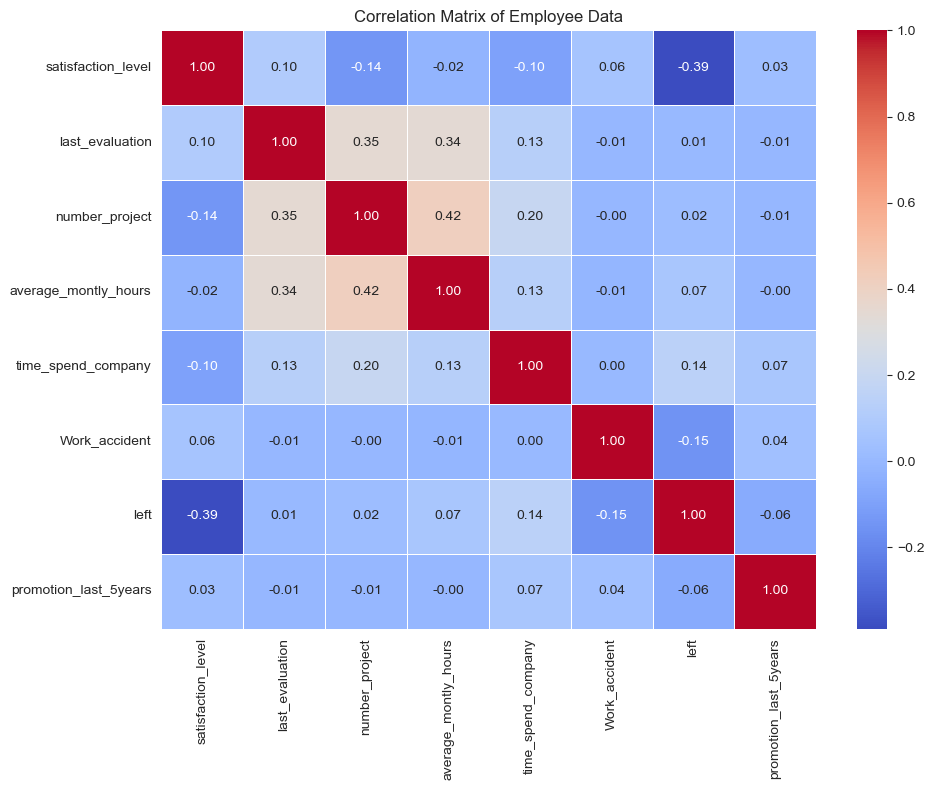

In [44]:
correlation_matrix = data.corr()


plt.figure(figsize=(10, 8))


sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)


plt.title('Correlation Matrix of Employee Data')
plt.tight_layout()


plt.show()

In [45]:
data.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

Here, you can see out of 15,000 approx 3,571 were left, and 11,428 stayed. The no of employee left is 23 % of the total employment.

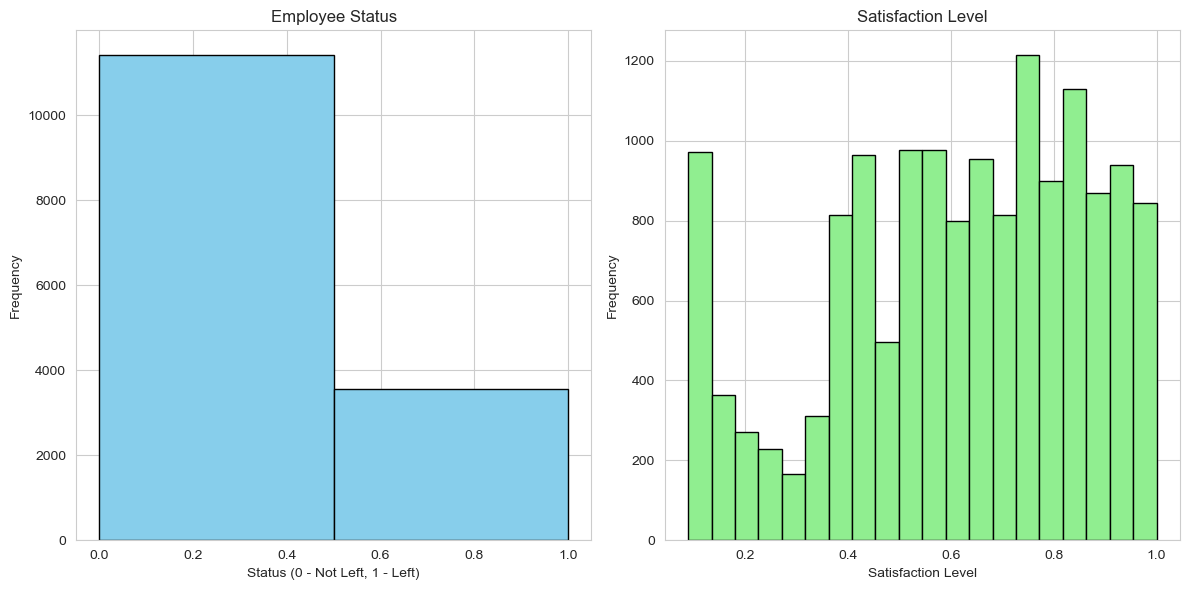

In [46]:
plt.figure(figsize=(12, 6))

# Plot histogram for employee status
plt.subplot(1, 2, 1)
plt.hist(data['left'], bins=2, color='skyblue', edgecolor='black')
plt.title('Employee Status')
plt.xlabel('Status (0 - Not Left, 1 - Left)')
plt.ylabel('Frequency')

# Plot histogram for satisfaction level
plt.subplot(1, 2, 2)
plt.hist(data['satisfaction_level'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Satisfaction Level')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

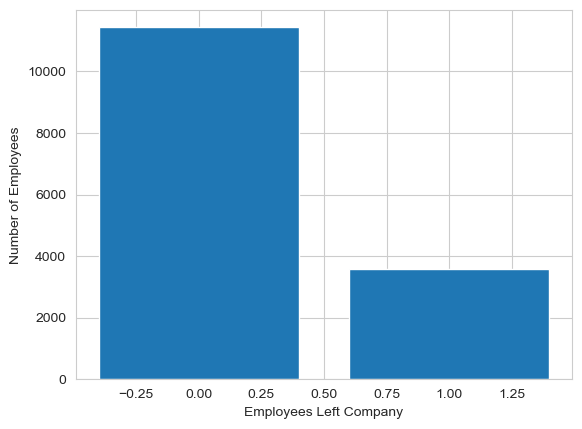

In [47]:
left_count = data.groupby('left').count()
plt.bar(left_count.index.values, left_count['satisfaction_level'])
plt.xlabel('Employees Left Company')
plt.ylabel('Number of Employees')
plt.show()

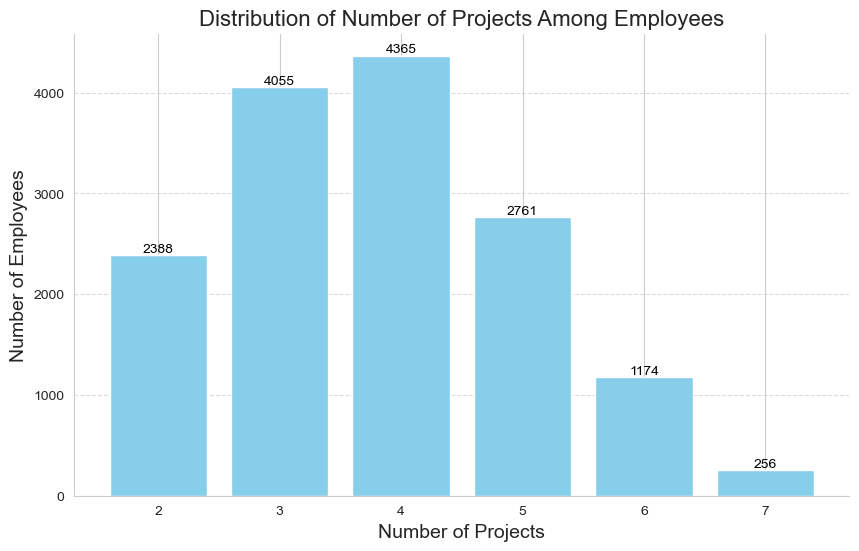

In [48]:
import matplotlib.pyplot as plt

num_projects = data.groupby('number_project').count()


plt.figure(figsize=(10, 6))
bars = plt.bar(num_projects.index.values, num_projects['satisfaction_level'], color='skyblue')


plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.xlabel('Number of Projects', fontsize=14)
plt.ylabel('Number of Employees', fontsize=14)
plt.title('Distribution of Number of Projects Among Employees', fontsize=16)


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '%d' % int(height), 
             ha='center', va='bottom', fontsize=10, color='black')

# Removing the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Showing the plot
plt.show()


Most of the employee is doing the project from 3-5.

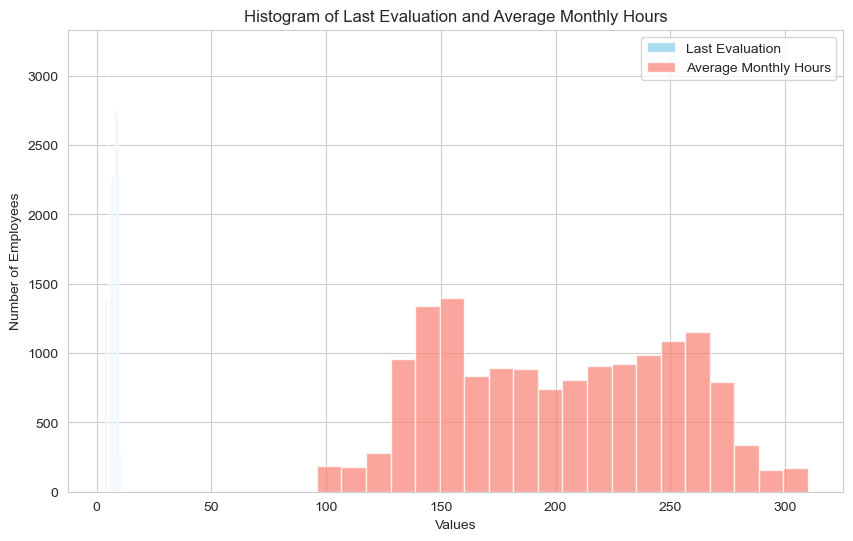

In [49]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing employee-related attributes
# Replace 'data' with the name of your DataFrame containing relevant employee data

# Setting up the figure
plt.figure(figsize=(10, 6))

# Histogram for Last Evaluation
plt.hist(data['last_evaluation'], bins=20, color='skyblue', alpha=0.7, label='Last Evaluation')

# Histogram for Average Monthly Hours
plt.hist(data['average_montly_hours'], bins=20, color='salmon', alpha=0.7, label='Average Monthly Hours')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Number of Employees')
plt.title('Histogram of Last Evaluation and Average Monthly Hours')

# Adding legend
plt.legend()

# Showing the plot
plt.show()


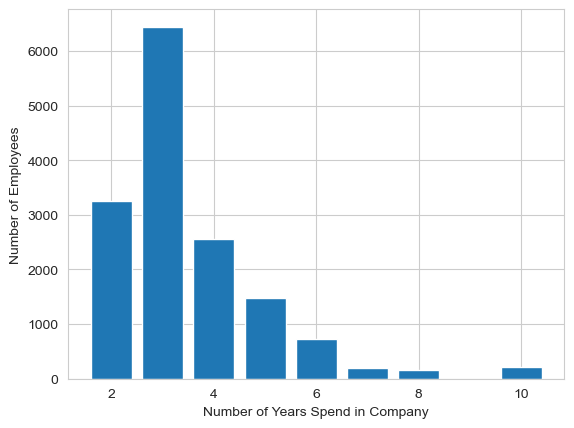

In [50]:
time_spent=data.groupby('time_spend_company').count()
plt.bar(time_spent.index.values, time_spent['satisfaction_level'])
plt.xlabel('Number of Years Spend in Company')
plt.ylabel('Number of Employees')
plt.show()

In [51]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,5,2,157,3,0,1,0,sales,low
1,0.80,8,5,262,6,0,1,0,sales,medium
2,0.11,8,7,272,4,0,1,0,sales,medium
3,0.72,8,5,223,5,0,1,0,sales,low
4,0.37,5,2,159,3,0,1,0,sales,low


## Applying K Means Clustering

In [52]:
left_emp =  data[['satisfaction_level', 'last_evaluation']][data.left == 1]
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)

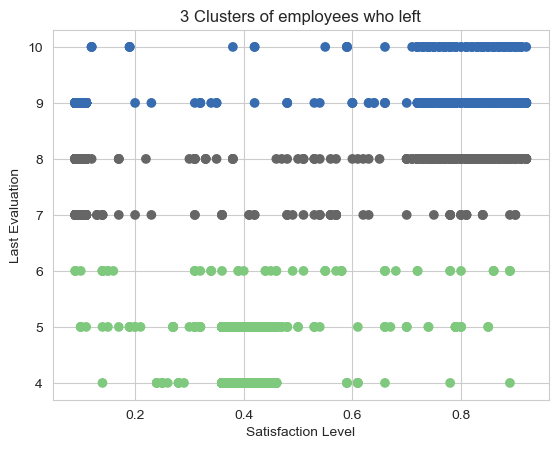

In [53]:
left_emp['label'] = kmeans.labels_
plt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'], c=left_emp['label'],cmap='Accent')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who left')
plt.show()

Here, Employee who left the company can be grouped into 3 type of employees:

(i) High Satisfaction and High Evaluation(Shaded by green color in the graph), you can also call them Winners."

(ii) Low Satisfaction and High Evaluation(Shaded by blue color(Shaded by green color in the graph), you can also call them Frustrated.

(iii) Moderate Satisfaction and moderate Evaluation (Shaded by grey color in the graph), you can also call them 'Bad match'.

## Pre-processing the data

In [54]:
le = preprocessing.LabelEncoder()
data['salary']=le.fit_transform(data['salary'])
data['Departments ']=le.fit_transform(data['Departments '])

## Training the model

In [55]:
x=data[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Departments ', 'salary']]
y=data['left']

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)  

## Applying Gradient Boosting Classifier

In [57]:
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

GradientBoostingClassifier()

In [58]:
gb_y_train_pred = gb.predict(x_train)
gb_y_test_pred = gb.predict(x_test)

In [59]:
gb_y_train_pred

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [60]:
gb_y_test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

accuracy = accuracy_score(y_test, gb_y_test_pred)
precision = precision_score(y_test, gb_y_test_pred)
recall = recall_score(y_test, gb_y_test_pred)

# Calculate confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, gb_y_test_pred).ravel()

# Calculate rates
total_samples = len(y_test)
tn_rate = tn / total_samples
tp_rate = tp / total_samples
fp_rate = fp / total_samples
fn_rate = fn / total_samples

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Negatives (TN):", tn)
print("True Positives (TP):", tp)
print("False Positives (FP):", fp)
print("False Negatives (FN):", fn)
print("True Negative Rate (TN Rate):", tn_rate)
print("True Positive Rate (TP Rate):", tp_rate)
print("False Positive Rate (FP Rate):", fp_rate)
print("False Negative Rate (FN Rate):", fn_rate)

Accuracy: 0.9708888888888889
Precision: 0.9572400388726919
Recall: 0.9188432835820896
True Negatives (TN): 3384
True Positives (TP): 985
False Positives (FP): 44
False Negatives (FN): 87
True Negative Rate (TN Rate): 0.752
True Positive Rate (TP Rate): 0.21888888888888888
False Positive Rate (FP Rate): 0.009777777777777778
False Negative Rate (FN Rate): 0.019333333333333334


## Applying Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression  
lr= LogisticRegression(random_state=0)  
lr.fit(x_train, y_train) 

C:\Users\harsh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [75]:
lr_y_train_pred = lr.predict(x_train)
lr_y_test_pred = lr.predict(x_test)

In [76]:
lr_y_train_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [77]:
lr_y_test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

accuracy = accuracy_score(y_test, lr_y_test_pred)
precision = precision_score(y_test, lr_y_test_pred)
recall = recall_score(y_test, lr_y_test_pred)

# Calculate confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, lr_y_test_pred).ravel()

# Calculate rates
total_samples = len(y_test)
tn_rate = tn / total_samples
tp_rate = tp / total_samples
fp_rate = fp / total_samples
fn_rate = fn / total_samples

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Negatives (TN):", tn)
print("True Positives (TP):", tp)
print("False Positives (FP):", fp)
print("False Negatives (FN):", fn)
print("True Negative Rate (TN Rate):", tn_rate)
print("True Positive Rate (TP Rate):", tp_rate)
print("False Positive Rate (FP Rate):", fp_rate)
print("False Negative Rate (FN Rate):", fn_rate)

Accuracy: 0.76
Precision: 0.49233716475095785
Recall: 0.23973880597014927
True Negatives (TN): 3163
True Positives (TP): 257
False Positives (FP): 265
False Negatives (FN): 815
True Negative Rate (TN Rate): 0.7028888888888889
True Positive Rate (TP Rate): 0.05711111111111111
False Positive Rate (FP Rate): 0.058888888888888886
False Negative Rate (FN Rate): 0.1811111111111111


## Applying Random Forest Classification

In [79]:
rf = RandomForestClassifier(n_estimators = 100, criterion = 'gini')
rf.fit(x_train,y_train)

RandomForestClassifier()

In [80]:
rf_y_train_pred = lr.predict(x_train)
rf_y_test_pred = lr.predict(x_test)


In [81]:
rf_y_train_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [82]:
rf_y_test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [83]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

accuracy = accuracy_score(y_test, rf_y_test_pred)
precision = precision_score(y_test, rf_y_test_pred)
recall = recall_score(y_test, rf_y_test_pred)

# Calculate confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, rf_y_test_pred).ravel()

# Calculate rates
total_samples = len(y_test)
tn_rate = tn / total_samples
tp_rate = tp / total_samples
fp_rate = fp / total_samples
fn_rate = fn / total_samples

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Negatives (TN):", tn)
print("True Positives (TP):", tp)
print("False Positives (FP):", fp)
print("False Negatives (FN):", fn)
print("True Negative Rate (TN Rate):", tn_rate)
print("True Positive Rate (TP Rate):", tp_rate)
print("False Positive Rate (FP Rate):", fp_rate)
print("False Negative Rate (FN Rate):", fn_rate)

Accuracy: 0.76
Precision: 0.49233716475095785
Recall: 0.23973880597014927
True Negatives (TN): 3163
True Positives (TP): 257
False Positives (FP): 265
False Negatives (FN): 815
True Negative Rate (TN Rate): 0.7028888888888889
True Positive Rate (TP Rate): 0.05711111111111111
False Positive Rate (FP Rate): 0.058888888888888886
False Negative Rate (FN Rate): 0.1811111111111111


## Evaluating accuracy

In [85]:
a = rf.score(x_test,y_test) # For Random Forest
a

0.9875555555555555

In [70]:
b = lr.score(x_test, y_test) # For Logistic Regression

In [71]:
c = gb.score(x_test, y_test) # For Gradient Boosting

## Conclusion

In conclusion, after employing logistic regression, random forest, and gradient boosting models to predict employee churn, it was found that the random forest model yielded the highest accuracy among the three. This suggests that the random forest algorithm may be the most suitable for predicting employee churn in this context.